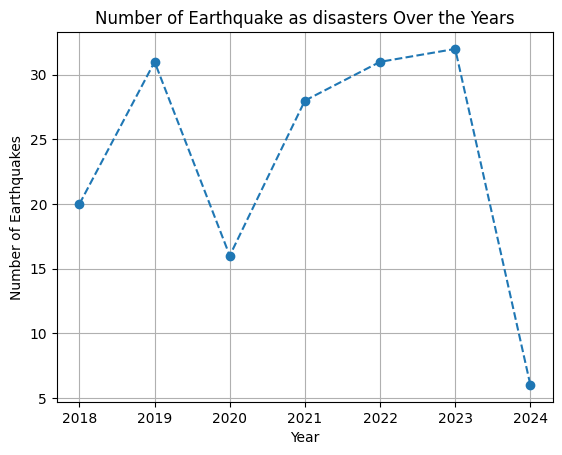

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'./disaster-events new.csv')


df_filtered = df[(df['Year'] >= 2018) & (df['Entity']=='Earthquake')]

plt.plot(df_filtered['Year'], df_filtered['Disasters'], marker='o', linestyle='--')

plt.title('Number of Earthquake as disasters Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')


plt.grid(True)


plt.show()


    

  

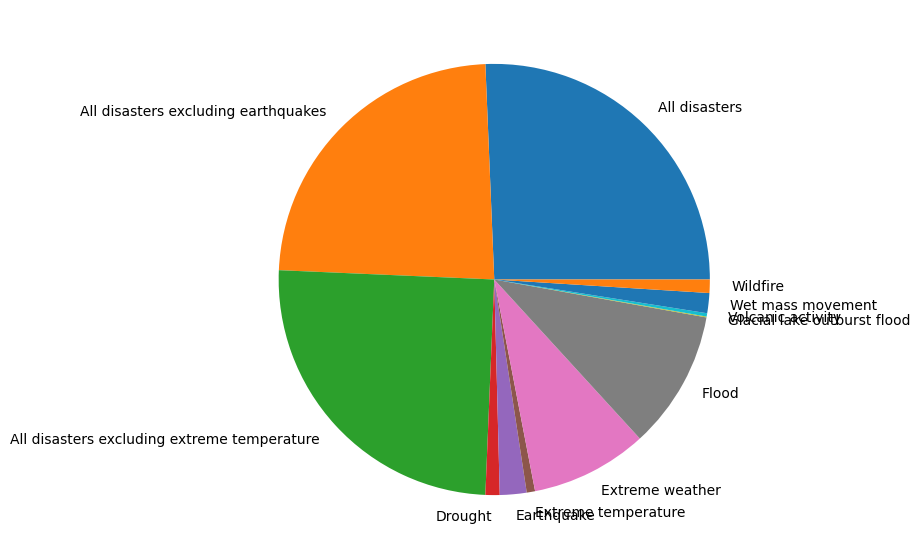

In [6]:
df = pd.read_csv(r'./disaster-events new.csv')
df_pie = df[(df['Year']== 2023) & (df['Entity']="All Disasters")]
fig=plt.figure(figsize=(10,7))
plt.pie(df_pie['Disasters'], labels=df_pie['Entity'])
plt.show()

